###Class 14 Homework: Yelp Review Text

This assignment uses the same data as the class 10 homework. This time, we will attempt to classify reviews as either 5-star or 1-star using only the review text!

After each task, I recommend that you check the shape and the contents of your objects, to confirm that they match your expectations.

###Read yelp.csv into a DataFrame.

In [1]:
import pandas as pd
yelp = pd.read_csv('../data/yelp.csv')
yelp.head(1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


###Create a new DataFrame that only contains the 5-star and 1-star reviews.

In [3]:
yelp.stars.value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

In [8]:
yelp15 = yelp[(yelp.stars == 1) | (yelp.stars == 5)]

In [9]:
yelp15.stars.value_counts()

5    3337
1     749
Name: stars, dtype: int64

###Split the new DataFrame into training and testing sets, using the review text as the only feature and the star rating as the response.

In [12]:
from sklearn.cross_validation import train_test_split

# define X and y
X = yelp15.text
y = yelp15.stars

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

###Use CountVectorizer to create document-term matrices from X_train and X_test.
Hint: If you run into a decoding error, instantiate the vectorizer with the argument decode_error='ignore'.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [15]:
X_train_dtm.shape

(3064, 16825)

##Use Naive Bayes to predict the star rating for reviews in the testing set, and calculate the accuracy.

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
y_pred_class = nb.predict(X_test_dtm)

In [20]:
from sklearn import metrics

print metrics.accuracy_score(y_test, y_pred_class)

0.918786692759


###Calculate the AUC.
Hint 1: Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes.

Hint 2: roc_auc_score will get confused if y_test contains fives and ones, so you will need to create a new object that contains ones and zeros instead.


In [21]:
# binarize the 1/5 scores into 0/1
import numpy as np
y_test_binary = np.where(y_test==5, 1, 0)

In [22]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [23]:
print metrics.roc_auc_score(y_test_binary, y_pred_prob)

0.940353585141


###Plot the ROC curve.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

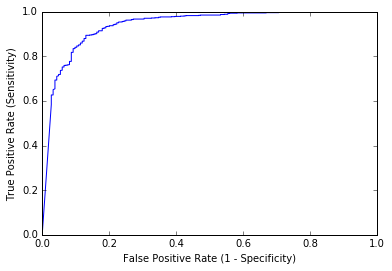

In [28]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test_binary, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

###Print the confusion matrix, and calculate the sensitivity and specificity. Comment on the results.

In [29]:
print metrics.confusion_matrix(y_test, y_pred_class)

[[126  58]
 [ 25 813]]


In [32]:
#sensitivity = TN / (TN+FP)
813 / float(813 + 25)

0.9701670644391408

In [33]:
#specificity = TP / (TP + FN)
126 / float(126 + 58)

0.6847826086956522

The model predicts 1 (5-star reviews) more accurately than it predicts 0 (1-star reviews).


Browse through the review text for some of the false positives and false negatives. Based on your knowledge of how Naive Bayes works, do you have any theories about why the model is incorrectly classifying these reviews?
Let's pretend that you want to balance sensitivity and specificity. You can achieve this by changing the threshold for predicting a 5-star review. What threshold approximately balances sensitivity and specificity?
Let's see how well Naive Bayes performs when all reviews are included, rather than just 1-star and 5-star reviews:
Define X and y using the original DataFrame from step 1. (y should contain 5 different classes.)
Split the data into training and testing sets.
Calculate the testing accuracy of a Naive Bayes model.
Compare the testing accuracy with the null accuracy.
Print the confusion matrix.
Comment on the results.